<a href="https://colab.research.google.com/github/americano-diana/redi_dataanalysis_24/blob/main/Mushroom_Classification_LearningPreject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preject for ReDI Data Analytics Winter 2024

**OBJECTIVE**:
Use https://www.kaggle.com/datasets/uciml/mushroom-classification/code to explore and visualize data.
Will use this project to learn how to do a logistic regression, decision tree, and bayesian logistic regression.
By. Diana Americano

1. **Download data** - kagglehub requires [installation](https://github.com/Kaggle/kagglehub) and setting up [API connection](https://www.kaggle.com/docs/api#authentication).

In [ ]:
import kagglehub
path = kagglehub.dataset_download("uciml/mushroom-classification")
print("Path to dataset files:", path)

100%|██████████| 34.2k/34.2k [00:00<00:00, 35.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1


2. **Explore data** - What does it look like? What can we do with it?

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_mushrooms=pd.read_csv("/root/.cache/kagglehub/datasets/uciml/mushroom-classification/versions/1/mushrooms.csv")

In [ ]:
df_mushrooms.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


3. **Transform data.** I want to be able to read through the data more easily, so I will transform data into an expanded df version, where the property names are expanded.

In [ ]:
# Class
class_dict = {'e': 'edible', 'p': 'poisonous'}

# Cap shape
cap_shape_dict = {
    'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat',
    'k': 'knobbed', 's': 'sunken'
}

# Cap surface
cap_surface_dict = {
    'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'
}

# Cap color
cap_color_dict = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
    'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red',
    'w': 'white', 'y': 'yellow'
}

# Bruises
bruises_dict = {'t': 'bruises', 'f': 'no'}

# Odor
odor_dict = {
    'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy',
    'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'
}

# Gill attachment
gill_attachment_dict = {
    'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'
}

# Gill spacing
gill_spacing_dict = {'c': 'close', 'w': 'crowded', 'd': 'distant'}

# Gill size
gill_size_dict = {'b': 'broad', 'n': 'narrow'}

# Gill color
gill_color_dict = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
    'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink',
    'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'
}

# Stalk shape
stalk_shape_dict = {'e': 'enlarging', 't': 'tapering'}

# Stalk root
stalk_root_dict = {
    'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal',
    'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'
}

# Stalk surface above ring
stalk_surface_above_ring_dict = {
    'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'
}

# Stalk surface below ring
stalk_surface_below_ring_dict = {
    'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'
}

# Stalk color above ring
stalk_color_above_ring_dict = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
    'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'
}

# Stalk color below ring
stalk_color_below_ring_dict = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
    'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'
}

# Veil type
veil_type_dict = {'p': 'partial', 'u': 'universal'}

# Veil color
veil_color_dict = {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}

# Ring number
ring_number_dict = {'n': 'none', 'o': 'one', 't': 'two'}

# Ring type
ring_type_dict = {
    'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring',
    'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'
}

# Spore print color
spore_print_color_dict = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
    'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'
}

# Population
population_dict = {
    'a': 'abundant', 'c': 'clustered', 'n': 'numerous',
    's': 'scattered', 'v': 'several', 'y': 'solitary'
}

# Habitat
habitat_dict = {
    'g': 'grasses', 'l': 'leaves', 'm': 'meadows',
    'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'
}

In [ ]:
# New DataFrame called df_mushrooms_expanded
df_mushrooms_expanded = df_mushrooms.copy()

# Apply the dictionaries to replace encoded values with full descriptions
df_mushrooms_expanded['class'] = df_mushrooms_expanded['class'].replace(class_dict)
df_mushrooms_expanded['cap-shape'] = df_mushrooms_expanded['cap-shape'].replace(cap_shape_dict)
df_mushrooms_expanded['cap-surface'] = df_mushrooms_expanded['cap-surface'].replace(cap_surface_dict)
df_mushrooms_expanded['cap-color'] = df_mushrooms_expanded['cap-color'].replace(cap_color_dict)
df_mushrooms_expanded['bruises'] = df_mushrooms_expanded['bruises'].replace(bruises_dict)
df_mushrooms_expanded['odor'] = df_mushrooms_expanded['odor'].replace(odor_dict)
df_mushrooms_expanded['gill-attachment'] = df_mushrooms_expanded['gill-attachment'].replace(gill_attachment_dict)
df_mushrooms_expanded['gill-spacing'] = df_mushrooms_expanded['gill-spacing'].replace(gill_spacing_dict)
df_mushrooms_expanded['gill-size'] = df_mushrooms_expanded['gill-size'].replace(gill_size_dict)
df_mushrooms_expanded['gill-color'] = df_mushrooms_expanded['gill-color'].replace(gill_color_dict)
df_mushrooms_expanded['stalk-shape'] = df_mushrooms_expanded['stalk-shape'].replace(stalk_shape_dict)
df_mushrooms_expanded['stalk-root'] = df_mushrooms_expanded['stalk-root'].replace(stalk_root_dict)
df_mushrooms_expanded['stalk-surface-above-ring'] = df_mushrooms_expanded['stalk-surface-above-ring'].replace(stalk_surface_above_ring_dict)
df_mushrooms_expanded['stalk-surface-below-ring'] = df_mushrooms_expanded['stalk-surface-below-ring'].replace(stalk_surface_below_ring_dict)
df_mushrooms_expanded['stalk-color-above-ring'] = df_mushrooms_expanded['stalk-color-above-ring'].replace(stalk_color_above_ring_dict)
df_mushrooms_expanded['stalk-color-below-ring'] = df_mushrooms_expanded['stalk-color-below-ring'].replace(stalk_color_below_ring_dict)
df_mushrooms_expanded['veil-type'] = df_mushrooms_expanded['veil-type'].replace(veil_type_dict)
df_mushrooms_expanded['veil-color'] = df_mushrooms_expanded['veil-color'].replace(veil_color_dict)
df_mushrooms_expanded['ring-number'] = df_mushrooms_expanded['ring-number'].replace(ring_number_dict)
df_mushrooms_expanded['ring-type'] = df_mushrooms_expanded['ring-type'].replace(ring_type_dict)
df_mushrooms_expanded['spore-print-color'] = df_mushrooms_expanded['spore-print-color'].replace(spore_print_color_dict)
df_mushrooms_expanded['population'] = df_mushrooms_expanded['population'].replace(population_dict)
df_mushrooms_expanded['habitat'] = df_mushrooms_expanded['habitat'].replace(habitat_dict)

# Display the expanded dataframe to confirm the changes
df_mushrooms_expanded.head(10)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,edible,bell,smooth,white,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,edible,bell,scaly,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,edible,bell,smooth,yellow,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


4. **Run some stats.** I'm interested in learning which variables are the most relevant to predict whether a mushroom is poisonous or edible. For this I will first try a [logistic regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) using sklearn.

In [ ]:
# Prepare data, need class to be binary
df_encoded = pd.get_dummies(df_mushrooms_expanded.drop(columns=['class']), drop_first=True)

# Encode the target variable ('class') to binary (edible = 1, poisonous = 0)
df_encoded['class'] = df_mushrooms_expanded['class'].apply(lambda x: 1 if x == 'edible' else 0)

df_encoded.head()


,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,cap-color_cinnamon,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,0
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,1
3,False,True,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,0
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1


In [ ]:
import sklearn

from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['class'])  # All features
y = df_encoded['class']  # Target (edible = 1, poisonous = 0)

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (5686, 95)
Test data shape: (2438, 95)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter if necessary to ensure convergence

# Train (fit) the model on the training data
model.fit(X_train, y_train)

# Display the model coefficients (importance of features)
print("Model coefficients:", model.coef_)

Model coefficients: [[-0.84308566  0.41867622  0.34315477  0.16908063  0.83103338 -0.83955408
  -0.35412319 -0.64836967 -1.19958871  0.88636194 -0.36421176  0.41843776
  -1.19867366  0.46893328 -0.30274214 -0.68880555  0.30737633  0.04166091
   1.6423562  -3.54758645 -0.9181889  -3.65251315 -0.38638905  3.72221304
  -2.71274165 -0.9228761  -0.20071985  2.27762334 -3.39601861  0.65593814
  -2.21459433 -0.18966736 -0.13398973 -0.86191999  0.1417935   0.4687055
   0.05421525  0.67716384  0.26257641 -0.29781067  0.7410319   2.3044083
   0.10243813  1.20521682  1.47367041 -0.2748559  -1.97672305  0.89926659
  -1.1366738  -0.49000432 -0.03624714 -0.26771504 -0.38638905  0.36395106
   0.45370389 -0.33063706  0.72002486  0.04879654 -0.80440176 -0.27738507
  -0.38638905  0.33716988  0.45370389 -0.49451178  0.57317369 -0.18180425
  -1.31810814  0.19549306  0.38680629 -0.80440176  0.67333204 -0.25083458
   1.59837479 -0.82352784 -0.38638905  0.28902619  0.92729573  0.12618923
  -1.68060903 -4.611

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Show a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Show classification report (includes precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9988
Confusion Matrix:
 [[1178    3]
 [   0 1257]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [ ]:
# Get feature importance from the model's coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Feature importance sorted by coefficient:")
print(feature_importance)


Feature importance sorted by coefficient:
                    Feature  Coefficient
23                odor_none     3.722213
41          stalk-root_club     2.304408
27     gill-spacing_crowded     2.277623
18               odor_anise     1.642356
72        ring-type_flaring     1.598375
..                      ...          ...
24             odor_pungent    -2.712742
28         gill-size_narrow    -3.396019
19            odor_creosote    -3.547586
21                odor_foul    -3.652513
79  spore-print-color_green    -4.611893

[95 rows x 2 columns]


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(model, X, y, cv=5)

# Output the cross-validation scores
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Average cross-validation accuracy: {cv_scores.mean():.4f}")


Cross-validation accuracy scores: [0.91015385 0.99938462 0.97723077 1.         0.61945813]
Average cross-validation accuracy: 0.9012


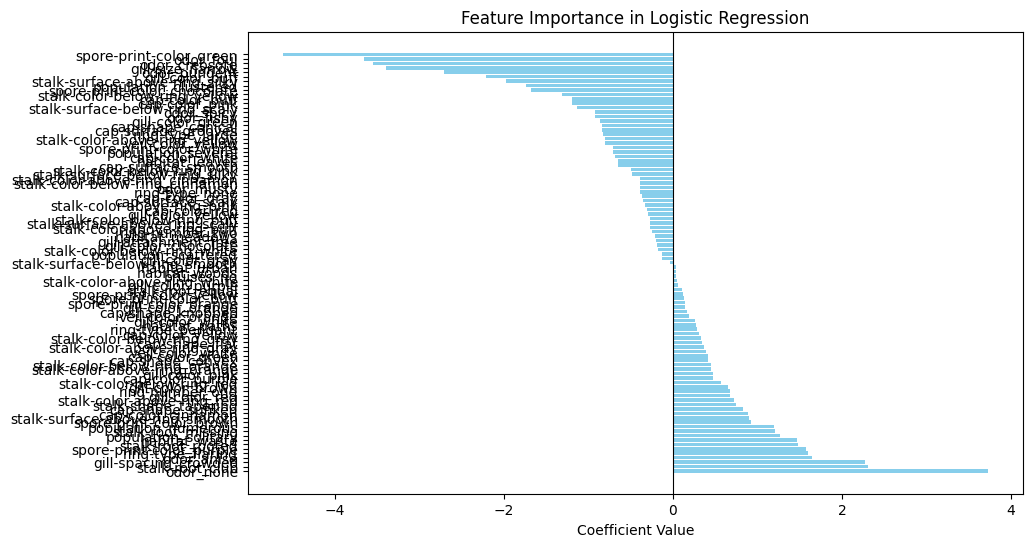

In [ ]:
import matplotlib.pyplot as plt

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.axvline(0, color='black', linewidth=0.8)  # Add a vertical line at x=0
plt.show()


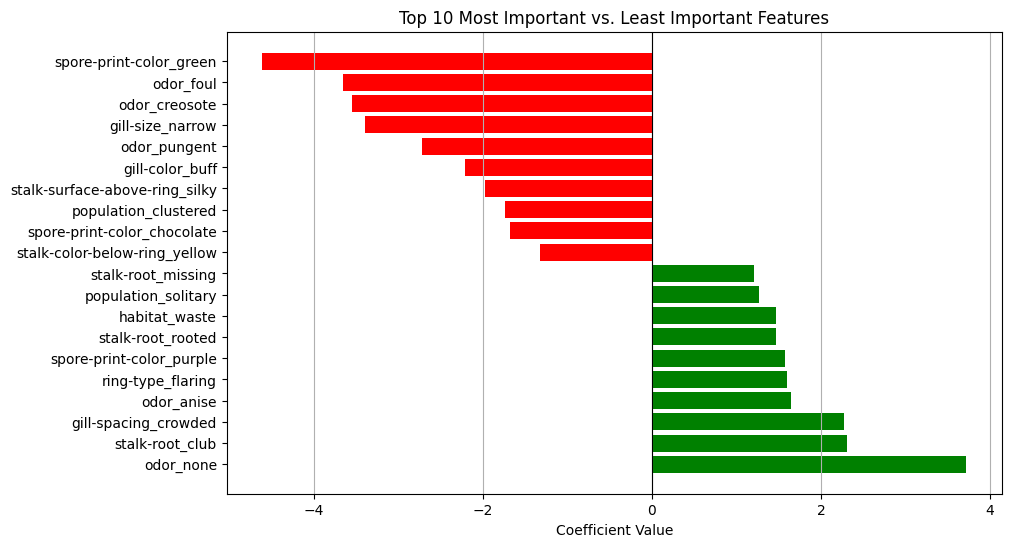

In [ ]:
# Step 1: Get the top 10 and bottom 10 features
top_10_features = feature_importance.head(10)  # Most important
bottom_10_features = feature_importance.tail(10)  # Least important

# Step 2: Concatenate the two DataFrames
combined_features = pd.concat([top_10_features, bottom_10_features])

# Step 3: Plotting
plt.figure(figsize=(10, 6))
plt.barh(combined_features['Feature'], combined_features['Coefficient'], color=['green' if x > 0 else 'red' for x in combined_features['Coefficient']])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Most Important vs. Least Important Features')
plt.axvline(0, color='black', linewidth=0.8)  # Add a vertical line at x=0
plt.grid(axis='x')

# Show the plot
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
